In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Ejemplo

Ahora, para comprender el alcance de la simulación Montecarlo, tomaremos el ejemplo de un apostador básico.

Referencia:
- https://pythonprogramming.net/monte-carlo-simulator-python/

Supongamos que estamos en un casino especial, donde el usuario puede tirar un *dado metafórico* que puede dar como resultado del número uno (1) al número cien (100).

Si el usuario tira cualquier número entre 1 y 50, el casino gana. Si el usuario tira cualquier número entre 51 y 99, el usuario gana. Si el usuario tira 100, pierde.

Con esto, el casino mantiene un margen del 1%, el cual es mucho más pequeño que el margen típico en casinos, al igual que el margen de mercado cuando se incorporan costos por transacción.

Por ejemplo, [Scottrade](https://www.scottrade.com/) cobra $\$7$ USD por transacción. Si se invierten $\$1000$ USD por acción, esto significa que tienes que pagar $\$7$ USD para entrar, y $\$7$ USD para salir, para un total de $\$14$ USD.

Esto pone el margen en 1.4\%. Esto significa, que a largo plazo, las ganancias tienen que ser mayores a 1.4\% en promedio, de otra manera se estará perdiendo dinero. Aunque este porcentaje es pequeño, las probabilidades ya están en contra. La comercialización de acciones es un juego 50/50, especialmente en el corto plazo.

De nuevo, con nuestro ejemplo en mente, 1-50, la casa gana. 51-99 el usuario gana. Un 100 significa que la casa gana.

Ahora, comencemos. Primero tenemos que crear nuestro dado.

**Explorar función randint de la librería random**


In [ ]:
np.random.randint(1,101)

57

In [ ]:
def ruleta():
  return np.random.randint(1,101)

Sin embargo, el dado por si solo no nos es útil. Necesitamos una función que nos devuelva sólamente si ganamos o perdemos.

In [ ]:
#Definir las reglas del juego:
def juego():
  resultado=ruleta()
  return (resultado>50)&(resultado<100),resultado

In [ ]:
juego()

(True, 76)

Ahora, necesitamos crear un apostador. Empezaremos con uno extremadamente básico por ahora. Veremos, que aún con un apostador muy básico, aparecerán cosas muy reveladoras usando un simulador montecarlo.

**Apostador simple.** Las caracterísitcas son:
* Se empieza con un capital inicial,
* Siempre se apuesta lo mismo,
* Y se va a apostar un número determinado de veces.
* Si se gana, se añade la apuesta al capital,
* Si se pierde, se descuenta la apuesta del capital.
* La función debe devolver un arreglo con el capital al final de cada apuesta.

In [ ]:
def apostador(capital_inicial,n_apuestas,apuesta):
  capital=np.zeros(n_apuestas+1)
  capital[0]=capital_inicial
  for i in range(n_apuestas):
    g,r=juego()
    if g:
      capital[i+1]=capital[i]+apuesta
    else:
      capital[i+1]=capital[i]-apuesta
  return capital

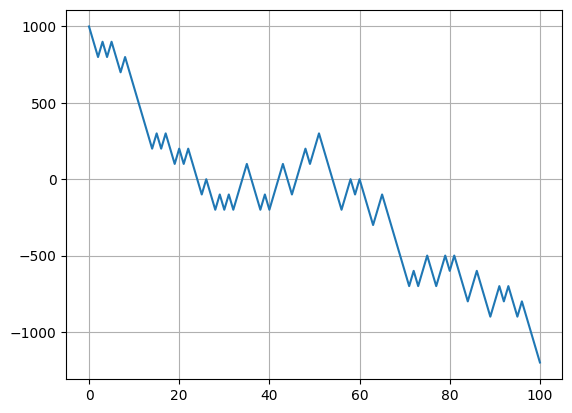

In [ ]:
plt.plot(apostador(1000,100,100))
plt.grid()

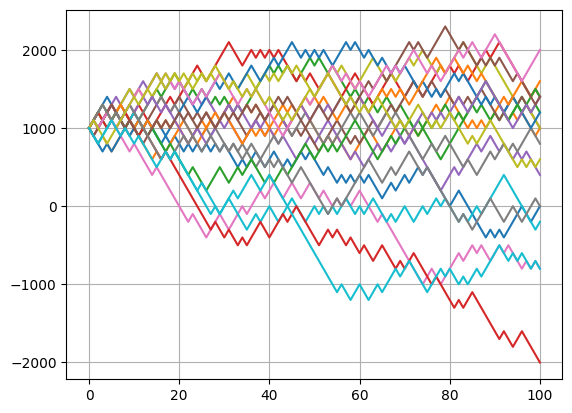

In [ ]:
N=20 #20 simulaciones
for i in range(N):
  plt.plot(apostador(1000,100,100))
plt.grid()

En realidad no nos importa tanto como evolucionan estos fondos. Nos importa más cuáles son los fondos al final (al largo plazo). Modificar la función anterior para ver esto.

In [ ]:
def apostador(capital_inicial,n_apuestas,apuesta):
  capital=capital_inicial
  for i in range(n_apuestas):
    g,r=juego()
    if g:
      capital+=apuesta
    else:
      capital-=apuesta
  return capital

In [ ]:
N=1000
B=0
for i in range(N):
  B+=apostador(1000,100,100)<=0 #Cuántos apostadores llegan a la quiebra con respecto a su capital inicial
B/N

0.244

# Simulación de una máquina de estados finitos
Definimos los estados de la máquina:
* $\epsilon_0$: reposo.
* $\epsilon_1$: activo (en espera).
* $\epsilon_2$: proceso 1.
* $\epsilon_3$. proceso 2.

Estando en reposo, el 95% de las interrupciones pasan al estado activo, en el estdo activo, según los históricos, 6 de 10 órdenes mandan la máquina a hacer el proceso 1 y 3 a hacer el proceso 2. En el proceso 1 el 75% de las veces finaliza en la máquina en reposo. En el proceso 2, 5% de las veces es necesario ejecutarlo de nuevo.

Modelar la máquina de estado como una caminata aleatoria y evaluar la probabilidad de que después de 1000 operaciones termine en reposo. Usar el método Montecarlo con 10000 escenarios.

**Modelado**

Le asignamos un valor a cada estado:
\begin{eqnarray}
\epsilon_0&=&0\\
\epsilon_1&=&1\\
\epsilon_2&=&2\\
\epsilon_3&=&3\\
\end{eqnarray}

Le asigmanos una probabilidad y una suma a cada transición:
|estado inicial|estado final|probabilidad|suma|
|--------------|------------|------------|----|
|$\epsilon_0$|$\epsilon_1$|0.95|+1|
|$\epsilon_0$|$\epsilon_0$|0.05|+0|
|$\epsilon_1$|$\epsilon_1$|0.1|+0|
|$\epsilon_1$|$\epsilon_2$|0.6|+1|
|$\epsilon_1$|$\epsilon_3$|0.3|+2|
|$\epsilon_2$|$\epsilon_0$|0.75|-2|
|$\epsilon_2$|$\epsilon_1$|0.25|-1|
|$\epsilon_3$|$\epsilon_1$|0.95|-2|
|$\epsilon_3$|$\epsilon_3$|0.05|-0|

In [ ]:
t=[-2,-1,0,1,2] #transición=posibles sumas
operaciones=1000
estado=0 #estado inicial
for i in range(operaciones):
  if estado==0:
    p=[0,0,0.05,0.95,0] #para sumarle -2 tengo probabilidad de 0, para -1 tengo 0, para 0 tengo 0.05, para +1 tengo 0.95 y para +2 tengo 0.
  elif estado==1:
    p=[0,0,0.1,0.6,0.3]
  elif estado==2:
    p=[0.75,0.25,0,0,0]
  else:
    p=[0.95,0,0.05,0,0]
  estado+=np.random.choice(t,p=p)

np.int64(1)

#TERMINAR

#SIMULACIÓN DE ESCENARIOS FUTUROS

# Simulación de escenarios futuros
<img style="float: right; margin: 0px 0px 15px 15px;" src="https://upload.wikimedia.org/wikipedia/commons/0/0a/Python.svg" width="200px" />

* Veremos un caso de aplicación de simulación montecarlo en la toma de decisiones.
* Python Data Analysis Library: `pandas` es una librería de código abierto, fácil de usar y que provee alto rendimiento en structuras de datos y herramientas de análisis de datos para el lenguaje de programación Python.

**Referencias:**
- http://pandas.pydata.org/
- https://www.learndatasci.com/best-data-science-online-courses/
- https://www.datacamp.com/community/tutorials/python-excel-tutorial
## Modelos extraídos de datos históricos
La fuente de datos es variada y depende de la aplicación y de la disiplina a estudiar. Alguna de las páginas que ofrecen datos para su análisis son:
* [Servición Simológico Nacional](http://www2.ssn.unam.mx:8080/catalogo/)
* [Precios de acciones, monedas e índices financieros](https://finance.yahoo.com/)
* [Temperaturas](https://climatereanalyzer.org/clim/t2_daily/)
* [Muchos, muchos datos](https://data.worldbank.org/)

# Ejemplo de temperaturas

Los siguientes datos son extraídas de la estación climática Copernicus C3S. Son temperaturas interpoladas usando modelos físicos de los trópicos desde 1940 a la fecha:

* **Lectura de archivos json**

In [1]:
import numpy as np
import pandas as pd

In [2]:
data_link='https://climatereanalyzer.org/clim/t2_daily/json/era5_tropics_t2_day.json'
# Más datos en:
# https://climatereanalyzer.org/clim/t2_daily/?dm_id=world
data=pd.read_json(data_link)
Nyears=85 # 2024-2940
last=366-pd.DataFrame(data.data[Nyears]).isna().sum()[0]
fecha=pd.concat([pd.date_range('1940-01-01','2024-12-31').to_series(),pd.date_range('2025-01-01',periods=last).to_series()])
datos=np.concatenate([i for i in data.iloc[:-3,-1]])
df_temps=pd.DataFrame(datos).dropna()
df_temps.index=fecha
df_temps.columns=['data']
df_temps

,data
1940-01-01,24.266
1940-01-02,24.327
1940-01-03,24.297
1940-01-04,24.308
1940-01-05,24.28
...,...
2025-10-12,25.589
2025-10-13,25.577
2025-10-14,25.561
2025-10-15,25.649


Evaluar que la media se mantenga a lo largo del tiempo y que tenga distribución normal

**Analicemos el conjunto de temperaturas para averiguar la probabilidad de que la temperatura baje un 0.5% en un mes.**

1. ¿Los datos tienen media constante?

<Axes: >

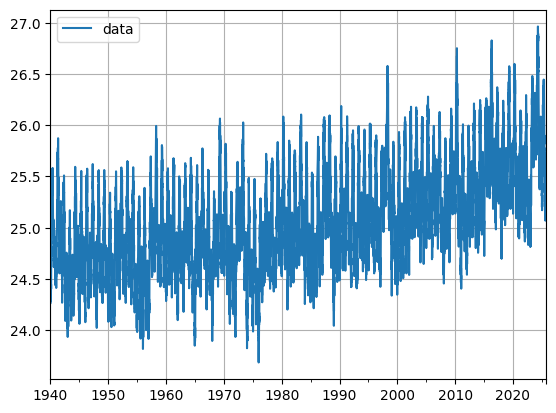

In [3]:
df_temps.plot(grid=True)

In [4]:
#Veo que la media No es constante, va aumentando conforme avanza el tiempo de manera al parecer exponencial

<Axes: >

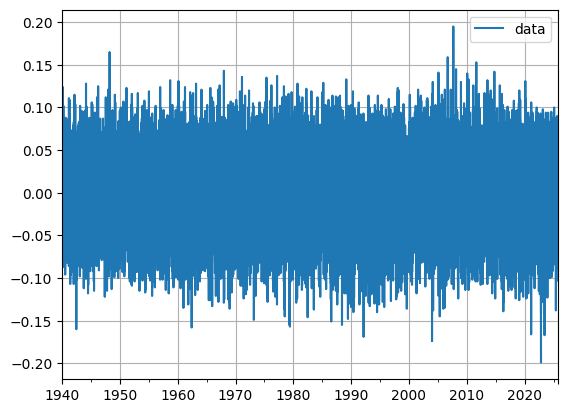

In [5]:
df_temps.diff().plot(grid=True)

In [6]:
#Veo que los incrementos de temperatura sí son constantes a lo largo del tiempo.

In [7]:
delta=df_temps.diff().dropna() #eliminamos todos los datos que están vacíos (NaN)
delta

,data
1940-01-02,0.061
1940-01-03,-0.03
1940-01-04,0.011
1940-01-05,-0.028
1940-01-06,-0.012
...,...
2025-10-12,-0.016
2025-10-13,-0.012
2025-10-14,-0.016
2025-10-15,0.088


2. ¿Los datos tienen distribución Normal?

<Axes: ylabel='Frequency'>

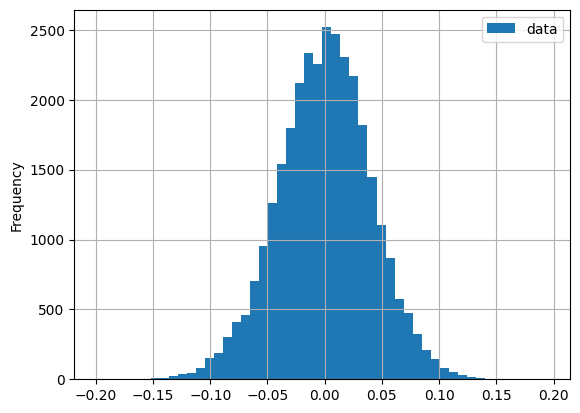

In [8]:
delta['data']=delta['data'].astype('float')
delta.plot(kind='hist',bins=50,grid=True)

In [ ]:
#Veo que los datos sí tienen distribución normal.

3. Generamos 10000 números aleatorios con la media y std para un mes

In [9]:
#Vamos a simular el delta de temperaturas, nwcesito la media y la desviación estándar
delta_sim=np.random.normal(delta.mean(),delta.std(),(30,10000)) #valores aleatorios con distribución normal, con la media y la desviación que yo indico
#el (30,10000) significa que de los próximos 30 días me va a predecir 10000 escenarios posibles para cada uno.
delta_sim[:2,:10] #le pido los primeros dos días después de la última fecha conocida, y 10 de los escenarios posibles de cada uno.

array([[-0.00390693, -0.07305229,  0.01633921,  0.00192624, -0.08406537,
         0.00844165,  0.01368779,  0.00044614, -0.01543512, -0.01489589],
       [ 0.05022254,  0.00972237, -0.07093522, -0.00913178,  0.01305991,
         0.00902866, -0.05886267,  0.02114125, -0.05382804,  0.01063668]])

In [10]:
#Aquí me está diciendo que una opción es un descenso de 0.0039° el primer día y un aumento de 0.0502 el segundo,
#mientras que otro escenario puede ser un descenso de 0.073° el día 1 y un aumento de 0.0097 el día 2, etc.

In [11]:
df_temps.index[-1] #mi último día conocido

Timestamp('2025-10-16 00:00:00')

In [14]:
#Le asignamos los días a cada escenario:
dias=pd.date_range('2025-10-17',periods=delta_sim.shape[0]) # a partir del día siguiente de mi último día conocido
dias

DatetimeIndex(['2025-10-17', '2025-10-18', '2025-10-19', '2025-10-20',
               '2025-10-21', '2025-10-22', '2025-10-23', '2025-10-24',
               '2025-10-25', '2025-10-26', '2025-10-27', '2025-10-28',
               '2025-10-29', '2025-10-30', '2025-10-31', '2025-11-01',
               '2025-11-02', '2025-11-03', '2025-11-04', '2025-11-05',
               '2025-11-06', '2025-11-07', '2025-11-08', '2025-11-09',
               '2025-11-10', '2025-11-11', '2025-11-12', '2025-11-13',
               '2025-11-14', '2025-11-15'],
              dtype='datetime64[ns]', freq='D')

In [15]:
df_delta=pd.DataFrame(delta_sim,index=dias)
df_delta

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-10-17,-0.003907,-0.073052,0.016339,0.001926,-0.084065,0.008442,0.013688,0.000446,-0.015435,-0.014896,...,0.004482,0.054840,0.060440,0.017294,0.033061,0.007371,0.016513,-0.019233,-0.005311,-0.092800
2025-10-18,0.050223,0.009722,-0.070935,-0.009132,0.013060,0.009029,-0.058863,0.021141,-0.053828,0.010637,...,0.016408,0.016118,0.022896,-0.044599,0.008337,0.016531,0.001450,0.066838,-0.106130,-0.079914
2025-10-19,-0.031087,-0.005236,-0.029935,-0.000449,-0.056897,0.066042,0.061625,-0.008149,-0.047572,0.011337,...,-0.008542,-0.016393,0.045538,-0.049854,0.010373,-0.037990,-0.011743,-0.053391,0.005093,0.050767
2025-10-20,-0.028350,-0.062444,-0.097136,-0.009661,-0.061741,-0.095739,0.067212,0.005357,-0.052099,0.015902,...,-0.067673,0.065468,0.010021,-0.021950,0.008912,0.030025,-0.098238,-0.033442,-0.011374,0.020609
2025-10-21,0.088027,-0.037417,-0.047147,-0.037019,-0.057012,-0.006583,0.020299,-0.004863,0.040796,-0.074201,...,0.000872,0.039934,0.004137,-0.006304,0.034095,-0.059609,-0.001796,-0.079077,0.011067,0.034610
2025-10-22,-0.054836,0.038794,0.042353,-0.015921,-0.028687,-0.035853,0.014153,0.028002,0.012640,-0.038715,...,-0.058952,-0.013441,0.020592,0.063781,0.041089,0.066938,-0.012763,-0.035965,-0.013242,-0.043572
2025-10-23,0.003024,-0.031492,0.022075,0.091396,0.054465,0.010019,-0.089356,-0.043655,-0.000801,-0.065000,...,0.085011,0.039220,0.084159,-0.016236,0.008855,-0.012136,-0.051190,0.030260,0.044827,-0.080536
2025-10-24,0.001541,0.006047,-0.052868,-0.016844,-0.005854,0.029157,-0.050339,0.002039,0.014193,0.058058,...,0.052165,0.020155,-0.034753,-0.048694,-0.009799,0.001138,0.015782,0.080322,0.033457,0.088365
2025-10-25,0.001271,0.021391,0.028325,0.015148,0.022032,-0.002653,0.005289,0.019149,0.088913,0.009847,...,0.023265,0.051482,0.001468,-0.059309,0.043045,0.017149,-0.020352,-0.017890,0.059781,-0.003151
2025-10-26,0.025055,-0.003040,0.035470,0.008270,-0.018452,0.019481,-0.008347,0.016632,-0.013940,-0.010778,...,0.007757,0.001001,-0.044536,-0.026197,-0.049214,0.078684,-0.015305,-0.009516,0.003361,-0.033043


4. Calculemos la probabilidad de que la temperatura baje 0.5%

Analizando el crecimiento de $\Delta_k$ en cada aumento de temperatura, observo que puedo calcular la $k$-ésima temperatura como
$$T_k=T_0+\sum_{i=1}^k\Delta_i$$

In [19]:
df_temps.iloc[-1]

,2025-10-16
data,25.682


In [20]:
df_temps.iloc[-1].values #esto es un arreglo

array([25.682], dtype=object)

In [21]:
df_temps.iloc[-1].values[0] #esta es mi T_0

25.682

In [22]:
temp_sim=df_temps.iloc[-1].values[0]+df_delta.cumsum() #cumsum es suma acumulada
temp_sim

,0,1,2,3,4,5,6,7,8,9,...,9990,9991,9992,9993,9994,9995,9996,9997,9998,9999
2025-10-17,25.678093,25.608948,25.698339,25.683926,25.597935,25.690442,25.695688,25.682446,25.666565,25.667104,...,25.686482,25.736840,25.742440,25.699294,25.715061,25.689371,25.698513,25.662767,25.676689,25.589200
2025-10-18,25.728316,25.618670,25.627404,25.674794,25.610995,25.699470,25.636825,25.703587,25.612737,25.677741,...,25.702890,25.752958,25.765336,25.654695,25.723398,25.705902,25.699964,25.729606,25.570559,25.509286
2025-10-19,25.697228,25.613434,25.597469,25.674345,25.554097,25.765512,25.698450,25.695438,25.565165,25.689078,...,25.694348,25.736564,25.810874,25.604842,25.733771,25.667912,25.688220,25.676215,25.575652,25.560052
2025-10-20,25.668878,25.550990,25.500333,25.664684,25.492356,25.669773,25.765662,25.700795,25.513065,25.704980,...,25.626675,25.802032,25.820895,25.582891,25.742683,25.697938,25.589983,25.642773,25.564278,25.580662
2025-10-21,25.756906,25.513573,25.453186,25.627665,25.435344,25.663190,25.785961,25.695931,25.553862,25.630779,...,25.627547,25.841966,25.825032,25.576587,25.776777,25.638329,25.588186,25.563696,25.575345,25.615272
2025-10-22,25.702070,25.552367,25.495539,25.611744,25.406657,25.627337,25.800114,25.723933,25.566501,25.592064,...,25.568595,25.828524,25.845624,25.640369,25.817867,25.705267,25.575424,25.527731,25.562104,25.571700
2025-10-23,25.705093,25.520875,25.517614,25.703140,25.461122,25.637355,25.710757,25.680278,25.565700,25.527064,...,25.653606,25.867745,25.929783,25.624133,25.826721,25.693131,25.524234,25.557991,25.606931,25.491164
2025-10-24,25.706634,25.526922,25.464745,25.686296,25.455268,25.666512,25.660418,25.682317,25.579893,25.585123,...,25.705771,25.887900,25.895031,25.575439,25.816923,25.694269,25.540015,25.638312,25.640387,25.579529
2025-10-25,25.707905,25.548313,25.493070,25.701445,25.477300,25.663859,25.665708,25.701466,25.668806,25.594969,...,25.729035,25.939382,25.896499,25.516130,25.859968,25.711418,25.519664,25.620423,25.700168,25.576378
2025-10-26,25.732960,25.545273,25.528540,25.709715,25.458848,25.683340,25.657361,25.718098,25.654866,25.584192,...,25.736792,25.940383,25.851962,25.489933,25.810754,25.790102,25.504359,25.610907,25.703529,25.543335


In [24]:
#Para evaluar el porcentaje, lo divido entre la temperatura conocida
temp_porcentual=temp_sim/df_temps.iloc[-1].values[0]
temp_porcentual.iloc[:2,:5]

,0,1,2,3,4
2025-10-17,0.999848,0.997156,1.000636,1.000075,0.996727
2025-10-18,1.001803,0.997534,0.997874,0.999719,0.997235


In [26]:
#necesito hacer una comparación por columnas para saber en qué escenarios de los 30 posibles de cada día, va a disminuir la temperatura
B=np.zeros(30)
limite=temp_porcentual<=0.995 #porque quiero el 0.005 menor
Porcentaje=np.mean(limite,axis=1) #con este promedio le estoy sumando la variable de Bernoulli y luego dividiendo entre los 10000 escenarios
Porcentaje.shape

(30,)

np.float64(0.2816)

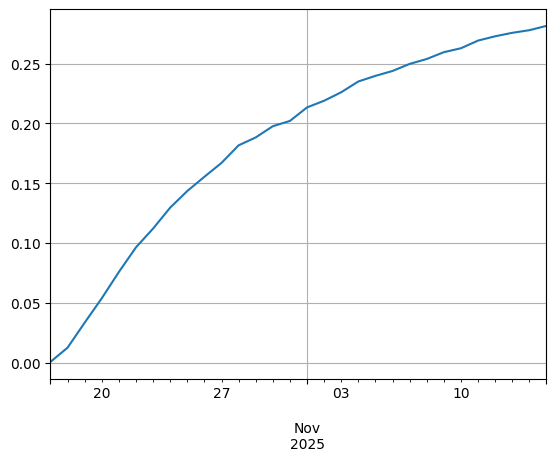

In [30]:
Porcentaje.plot(grid=True)
Porcentaje.iloc[-1]

Vemos que en un inicio la probabilidad es nula, y va aumentando hasta alcanzar un 28% al final del mes.
___

Calculamos las temperaturas para los deltas simulados
$$
T_k=T_0\Pi_{i=1}^k(delta_i+1)
$$